## Making trees work - Exercise
```In this exercise you will experience with Decision Trees and Random Forests. During this part you will explore the different features of them and will plot your results. Hence, whenever exploration tasks are marked with (*), know that you are asked to plot two graphs (on the same plot): the training score against the explored feature and the test score against it.```

```~Ittai Haran```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

```Read the dataset. In this dataset, you are provided over a hundred variables describing attributes of life insurance applicants. The task is to predict the "Response" variable.```

In [2]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('insurance_fixed.csv')
X = df.drop(['Response'], axis = 1)
Y = df['Response']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3)

```We will start by using Decision trees. Use a simple DecisionTreeClassifier with default values to predict on your train and on your test. Evaluate the model using the accuracy metric, which you can find in sklearn.```

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
basic_tree = DecisionTreeClassifier()
basic_tree.fit(X_train, Y_train)
print('score on training: {score}'.format(score = accuracy_score(Y_train, basic_tree.predict(X_train))))
print('score on test: {score}'.format(score = accuracy_score(Y_test, basic_tree.predict(X_test))))

score on training: 0.9999759418755714
score on test: 0.42997474038731404


```Unfortunately, you are at overfit. Now let's try to get better. Try playing with the max depth of the tree, for``` $1\leq depth \leq25$ ```(*) (This means you are asked to plot some graphs, remember? :) )```

```Choose the optimal max_depth based on the graph you got.```

In [5]:
training_score = []
test_score = []
depths = range(1,26)
for max_depth in depths:
    basic_tree = DecisionTreeClassifier(max_depth=max_depth)
    basic_tree.fit(X_train, Y_train)
    training_score.append(accuracy_score(Y_train, basic_tree.predict(X_train)))
    test_score.append(accuracy_score(Y_test, basic_tree.predict(X_test)))
    
plt.plot(depths, training_score,label="train")
plt.plot(depths, test_score,label="test")
plt.xlabel('max depth')
plt.ylabel('score')
plt.title('score againts max depth of the tree')
plt.show()

KeyboardInterrupt: 

```Choose the best max_depth you found. Now try playing with min_samples_leaf. use the following values: [1, 10, 100, 300,700, 1000]. Do it also with max_depth = 20. What can we learn from the graphs? Please answer the question``` $\ \underline{in\ another\ cell}$ ```.(*)```

In [ ]:
for max_depth in [7,20]:
    training_score = []
    test_score = []
    min_samples_leaves = [1, 10, 100, 300,700, 1000]
    for min_samples_leaf in min_samples_leaves:
        basic_tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        basic_tree.fit(X_train, Y_train)
        training_score.append(accuracy_score(Y_train, basic_tree.predict(X_train)))
        test_score.append(accuracy_score(Y_test, basic_tree.predict(X_test)))
    plt.plot(min_samples_leaves, training_score,label="train")
    plt.plot(min_samples_leaves, test_score,label="test")
    plt.xlabel('min_samples_leaf')
    plt.ylabel('score')
    plt.legend()
    plt.title('score againts max min samples leaf of the tree, depth='+str(max_depth))
    plt.show()

```Decision Tree is a very nice algorithm, especially because it is very intuitive and explainable. We can even draw it!
Train a simple Decision Tree with max_depth = 3. Call it basic_tree and run the cell below. Examine the file tree.png you created.```

In [6]:
basic_tree = DecisionTreeClassifier(max_depth=3)
basic_tree = basic_tree.fit(X_train, Y_train)

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(basic_tree, out_file = 'tree.dot', filled  = True,
                rounded = True, feature_names = X_train.columns)
!dot -Tpng tree.dot -o tree.png

```Look at the tree you got. What, would you say, are the most important features?
As you recall, we talked about feature importance in class. Use the attribute feature_importance_ of your tree to get a list of the most important features.```

In [9]:
sorted(zip(X.columns, basic_tree.feature_importances_), key = lambda x: -x[1])

[('BMI', 0.5553001206628454),
 ('Medical_History_23', 0.20055949809801182),
 ('Medical_History_4', 0.19148556584579865),
 ('Product_Info_4', 0.052654815393344205),
 ('Product_Info_1', 0.0),
 ('Product_Info_3', 0.0),
 ('Product_Info_5', 0.0),
 ('Product_Info_6', 0.0),
 ('Product_Info_7', 0.0),
 ('Ins_Age', 0.0),
 ('Ht', 0.0),
 ('Wt', 0.0),
 ('Employment_Info_1', 0.0),
 ('Employment_Info_2', 0.0),
 ('Employment_Info_3', 0.0),
 ('Employment_Info_4', 0.0),
 ('Employment_Info_5', 0.0),
 ('Employment_Info_6', 0.0),
 ('InsuredInfo_1', 0.0),
 ('InsuredInfo_2', 0.0),
 ('InsuredInfo_3', 0.0),
 ('InsuredInfo_4', 0.0),
 ('InsuredInfo_5', 0.0),
 ('InsuredInfo_6', 0.0),
 ('InsuredInfo_7', 0.0),
 ('Insurance_History_1', 0.0),
 ('Insurance_History_2', 0.0),
 ('Insurance_History_3', 0.0),
 ('Insurance_History_4', 0.0),
 ('Insurance_History_5', 0.0),
 ('Insurance_History_7', 0.0),
 ('Insurance_History_8', 0.0),
 ('Insurance_History_9', 0.0),
 ('Family_Hist_1', 0.0),
 ('Family_Hist_2', 0.0),
 ('Family_Hi

```We will now move to Random Forest. Repeat the exlporations tasks with a Random forest with 100 trees (max depth and min samples leaf). In addition, vary the number of trees between 10 and 400, while maintaining low max_depth (*) and the max_feature parameter, between 0.1 and 1 (*). Try explaining the graphs you see ``` $\ \underline{in\ a\ different\ cell}$ ```. Use the flag n_jobs = -1 in your experiments to accelerate your computation time. Make sure to understand where your model is overfitted.```

In [10]:
from sklearn.ensemble import RandomForestClassifier

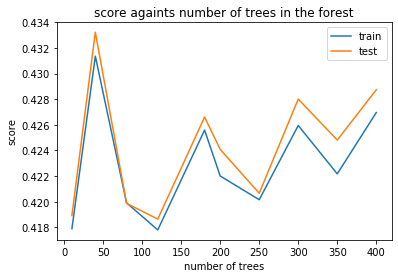

In [11]:
training_score = []
test_score = []
number_of_trees = [10,40,80,120,180,200,250,300,350,400]
for number in number_of_trees:
    random_forest = RandomForestClassifier(n_estimators=number, max_depth=4)
    random_forest.fit(X_train, Y_train)
    training_score.append(accuracy_score(Y_train, random_forest.predict(X_train)))
    test_score.append(accuracy_score(Y_test, random_forest.predict(X_test)))
plt.plot(number_of_trees, training_score,label="train")
plt.plot(number_of_trees, test_score,label="test")
plt.xlabel('number of trees')
plt.ylabel('score')
plt.legend()
plt.title('score againts number of trees in the forest')
plt.show()

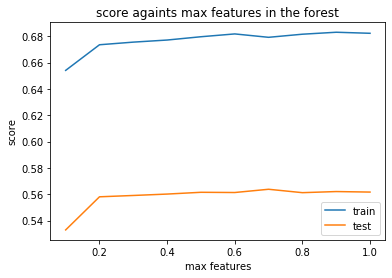

In [12]:
training_score = []
test_score = []
max_features_list = np.arange(0.1,1.1,0.1)
for max_features in max_features_list:
    random_forest = RandomForestClassifier(n_estimators=100, max_depth=12, max_features=max_features, n_jobs = -1)
    random_forest.fit(X_train, Y_train)
    training_score.append(accuracy_score(Y_train, random_forest.predict(X_train)))
    test_score.append(accuracy_score(Y_test, random_forest.predict(X_test)))
plt.plot(max_features_list, training_score, label='train')
plt.plot(max_features_list, test_score, label='test')
plt.xlabel('max features')
plt.ylabel('score')
plt.legend()
plt.title('score againts max features in the forest')
plt.show()

```As you could see, at least one of your graphs turned out to be very noisy. Use K Fold cross validation to evalute your model more accurately. In K Fold cross validation we split our data into K segments, and for each ``` $1 \leq i\leq K$ ``` we test our model on the i-th segment while training it using the others.```

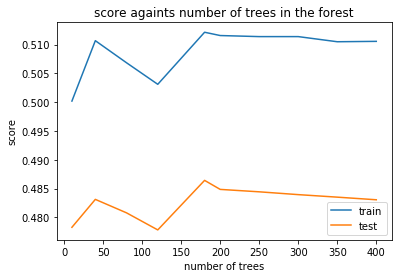

In [16]:
from sklearn.model_selection import KFold

def get_acc_on_folds(clf, X, Y, all_but, seg):
    clf.fit(X.iloc[all_but], Y.iloc[all_but])
    return accuracy_score(Y.iloc[all_but], clf.predict(X.iloc[all_but])), accuracy_score(Y.iloc[seg], clf.predict(X.iloc[seg]))

training_score = []
test_score = []
number_of_trees = [10,40,80,120,180,200,250,300,350,400]
for number in number_of_trees:
    k_fold = KFold(5)
    all_grades = list(map(lambda x: get_acc_on_folds(RandomForestClassifier(n_estimators=number, max_depth=7), X, Y, x[0], x[1]), k_fold.split(X,Y)))
    training_score.append(np.mean(list(map(lambda x: x[0], all_grades))))
    test_score.append(np.mean(list(map(lambda x: x[1], all_grades))))
plt.plot(number_of_trees, training_score,label='train')
plt.plot(number_of_trees, test_score,label='test')
plt.xlabel('number of trees')
plt.ylabel('score')
plt.legend()
plt.title('score againts number of trees in the forest')
plt.show()

```Use the Random Forest to surpass the best score you got using Decision Tree.```

In [18]:
random_forest = RandomForestClassifier(n_estimators=200, max_depth=16, max_features=0.8, n_jobs=-1)
random_forest.fit(X_train, Y_train)
print(accuracy_score(Y_test, random_forest.predict(X_test)))

0.5667695761998316


## Extra thinking on feature importance

```We talked about feature importance in class. get the feature importance of each feature using a decision tree and using a random forest. Use in both cases the best hyper parameters you found so far. Discuss the differences between the answers``` $\underline{in\ a\ cell}$.

In [19]:
sorted(zip(X.columns, random_forest.feature_importances_), key=lambda x: -x[1])

[('BMI', 0.17469493576615644),
 ('Product_Info_4', 0.05968031482527182),
 ('Medical_History_4', 0.054882063428079525),
 ('Ins_Age', 0.048012755812632056),
 ('Wt', 0.04731473899286288),
 ('Medical_History_15', 0.04475838460612278),
 ('Medical_History_23', 0.04118083289779813),
 ('Employment_Info_1', 0.032500160651194064),
 ('Medical_History_2', 0.025845017595819784),
 ('Medical_History_1', 0.025501949966085364),
 ('Family_Hist_3', 0.024479237823536),
 ('Employment_Info_6', 0.023154697715299117),
 ('Family_Hist_4', 0.021942568567606985),
 ('Medical_Keyword_3', 0.021717489099357248),
 ('Medical_Keyword_15', 0.019430163534435264),
 ('Insurance_History_5', 0.01886489401817816),
 ('Ht', 0.018566682864826056),
 ('Family_Hist_5', 0.0179908235578377),
 ('Family_Hist_2', 0.01617108089755288),
 ('InsuredInfo_3', 0.015167757704958209),
 ('InsuredInfo_6', 0.011326720190101067),
 ('Employment_Info_2', 0.011277617521231431),
 ('Medical_History_24', 0.010157769423606088),
 ('Medical_History_30', 0.008

```We can define a concept of feature importance for linear regression: Suppose you have two features, ```$x_1$ ```and``` $x_2$. ```Suppose that you got a linear regression of the form```

$y = 100\cdot x_1 + 1\cdot x_2$

```What feature is more important? What if we have -100 instead of 100? Generalize this idea to any number of features. Train a linear regression on your data and get the feature importances.```

In [44]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [21]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, Y_train)
sorted(zip(X.columns, model.coef_), key=lambda x: -abs(x[1]))

[('Wt', -3.851328947880328),
 ('BMI', -3.1613232732597645),
 ('Insurance_History_5', -2.9944537630749677),
 ('Ht', 2.171407106199229),
 ('Medical_History_5', -1.8284865257127285),
 ('Medical_Keyword_3', -1.4854674081456505),
 ('Ins_Age', -1.2881705218959296),
 ('Medical_History_35', -1.2773878250076005),
 ('Medical_History_4', 1.1901119593685983),
 ('Medical_Keyword_38', -1.0923123751995762),
 ('Medical_History_20', 1.0640665079497043),
 ('InsuredInfo_2', -0.9836326923246099),
 ('Medical_History_30', -0.9493234159897195),
 ('Medical_Keyword_41', 0.9248768396279567),
 ('Medical_Keyword_9', -0.8873611387107558),
 ('Product_Info_4', 0.8160259730876822),
 ('Medical_History_18', -0.7984273750043757),
 ('Medical_History_11', 0.7475215530063843),
 ('Medical_History_17', 0.6616692026652575),
 ('InsuredInfo_5', -0.5830158521821777),
 ('Medical_History_40', 0.5654445294185401),
 ('Medical_History_27', 0.5115338311100649),
 ('Medical_History_7', 0.4969189490842192),
 ('Employment_Info_4', -0.4890

## Ensemble methods and stacking
```In this part we will explore the concept of model stacking: that is, training a model, the combining model, on the outputs of several other models. Hence, the stacking method has two steps: first we train our models, and than we train the combining model using the outputs of those models.```

```In the setting of stacking models it is very important to train the several models on one segment of the data and train the combining model on another segment. Hence, start by splitting the data to 3 segments: train_1 segment, 35% of the data, train_2 segment, 35% of the data, and test segment, the last 30% of the data.```

In [22]:
df = pd.read_csv('insurance_fixed.csv')
segments_train_test = np.split(df.index.values, (len(df)*np.array([0.35,0.7])).astype(int))
segments = segments_train_test[:-1]
test_segment = segments_train_test[-1]

X_test = df.iloc[test_segment].drop(['Response'], axis = 1)
Y_test = df.iloc[test_segment]['Response']

```Our first experiment is as follows: train a random forest of simple decision trees (30 trees, max_depth = 3), using train_1. Use the estimators of the forest to create 30*8=240 features: for each estimator get the probabilities it gives for the target to belong to any of the classes. You can get the list of the estimators using RandomForestClassifier.estimators_ and have the probabilities mentioned using model.predict_proba.
Using the new features you got (and them only), train a logistic regression (LogisticRegression).
Compare between the accuracy of the first random forest (on the test segment) and the accuracy of the stacked models (again, on the test segment).```

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

In [47]:
model_1 = RandomForestClassifier(n_estimators=30, max_depth=3, max_features=0.8, n_jobs=-1)

X = df.iloc[segments[0]].drop(['Response'], axis = 1)
Y = df.iloc[segments[0]]['Response']
model_1.fit(X,Y)
print('model accuracy: ' +str(accuracy_score(Y_test, model_1.predict(X_test).astype(int))))
print('log loss: ' + str(log_loss(Y_test, model_1.predict_proba(X_test))))

X = df.iloc[segments[1]].drop(['Response'], axis = 1)
Y = df.iloc[segments[1]]['Response']
all_results = np.concatenate(list(map(lambda x: x.predict_proba(X), model_1.estimators_)), axis=-1)

model = LogisticRegression()
model.fit(all_results, Y)

all_results_test = np.concatenate(list(map(lambda x: x.predict_proba(X_test), model_1.estimators_)), axis=-1)
predictions = model.predict_proba(all_results_test)

print('model accuracy: ' + str(accuracy_score(Y_test, model.predict(all_results_test))))
print('log loss: ' + str(log_loss(Y_test, model.predict_proba(all_results_test))))

model accuracy: 0.479202918888577
log loss: 1.4863954734621634


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


model accuracy: 0.5185517822060062
log loss: 1.3929669304177288


```We will conduct a similar experiment: create a set of at least 5 different models, of different kinds - use algorithms we talked about in class. Stack them to get a better model. Compare the accuracies of the models to the accuracy of your stacked model.```

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LogisticRegression, RidgeClassifier, RidgeClassifierCV

In [51]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC

In [56]:
model_1 = DecisionTreeClassifier(max_depth=7)
model_2 = KNeighborsClassifier(3, n_jobs=-1)
model_3 = KNeighborsClassifier(6, n_jobs=-1)
model_4 = AdaBoostClassifier()
model_5 = LogisticRegression()
model_6 = RandomForestClassifier(n_estimators=200, max_depth=16, max_features=0.8, n_jobs=-1)
all_models = [model_1, model_2, model_3, model_4, model_5, model_6]

X = df.iloc[segments[0]].drop(['Response'], axis = 1)
Y = df.iloc[segments[0]]['Response']
all_models = list(map(lambda x: x.fit(X,Y), all_models))
all_accs = list(map(lambda x: accuracy_score(Y_test, x.predict(X_test)), all_models))
all_results_test = np.concatenate(list(map(lambda x: x.predict_proba(X_test), all_models)), axis=-1)

X_seg_1 = df.iloc[segments[1]].drop(['Response'], axis = 1)
Y_seg_1 = df.iloc[segments[1]]['Response']
all_results = np.concatenate(list(map(lambda x: x.predict_proba(X_seg_1), all_models)), axis=-1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [57]:
model = RidgeClassifier()
model.fit(all_results, Y_seg_1)

predictions = model.predict(all_results_test)

print('all accuracies: ' + str(all_accs))
print('final accuracy: ' + str(accuracy_score(Y_test, predictions)))

all accuracies: [0.5272523154644962, 0.27577883805781644, 0.3213022733651417, 0.4971653101319113, 0.491103003087286, 0.5621105809710918]
final accuracy: 0.5461689587426326


```As we said earlier, it is very important use two different train segments. What happens if you use the same train segment in both steps of the stacked model? Note that you now use more data to train your models, and also your combining model. Do you get better results? Do it and explain your results ```$\underline{\ in\ a\ cell\ below.}$

In [55]:
df = pd.read_csv('insurance_fixed.csv')
segments_train_test = np.split(df.index.values, (len(df)*np.array([0.7])).astype(int))
segments = segments_train_test[:-1]
segments = segments + segments
test_segment = segments_train_test[-1]

X_test = df.iloc[test_segment].drop(['Response'], axis = 1)
Y_test = df.iloc[test_segment]['Response']

model_1 = DecisionTreeClassifier(max_depth=7)
model_2 = KNeighborsClassifier(3, n_jobs=-1)
model_3 = KNeighborsClassifier(6, n_jobs=-1)
model_4 = AdaBoostClassifier()
model_5 = LogisticRegression()
model_6 = RandomForestClassifier(n_estimators=200, max_depth=16, max_features=0.8, n_jobs=-1)
all_models = [model_1, model_2, model_3, model_4, model_5, model_6]

X = df.iloc[segments[0]].drop(['Response'], axis = 1)
Y = df.iloc[segments[0]]['Response']
all_models = list(map(lambda x: x.fit(X,Y), all_models))
all_accs = list(map(lambda x: accuracy_score(Y_test, x.predict(X_test)), all_models))
all_results_test = np.concatenate(list(map(lambda x: x.predict_proba(X_test), all_models)), axis=-1)

X_seg_1 = df.iloc[segments[1]].drop(['Response'], axis = 1)
Y_seg_1 = df.iloc[segments[1]]['Response']
all_results = np.concatenate(list(map(lambda x: x.predict_proba(X_seg_1), all_models)), axis=-1)

model = RidgeClassifier()
model.fit(all_results, Y_seg_1)

predictions = model.predict(all_results_test)

print('all accuracies: ' + str(all_accs))
print('final accuracy: ' + str(accuracy_score(Y_test, predictions)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


all accuracies: [0.5270839180465899, 0.27577883805781644, 0.3213022733651417, 0.4971653101319113, 0.491103003087286, 0.5608195341004771]
final accuracy: 0.5451585742351951
